In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator
from scipy import stats

In [2]:
crc_pt_pca = pd.read_csv("./pca_data/crc_pt_pca.csv")
stad_pt_pca = pd.read_csv("./pca_data/stad_pt_pca.csv")
ucec_pt_pca = pd.read_csv("./pca_data/ucec_pt_pca.csv")

In [194]:
#sns.set_context("paper", rc{"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3053155000.py, line 1)

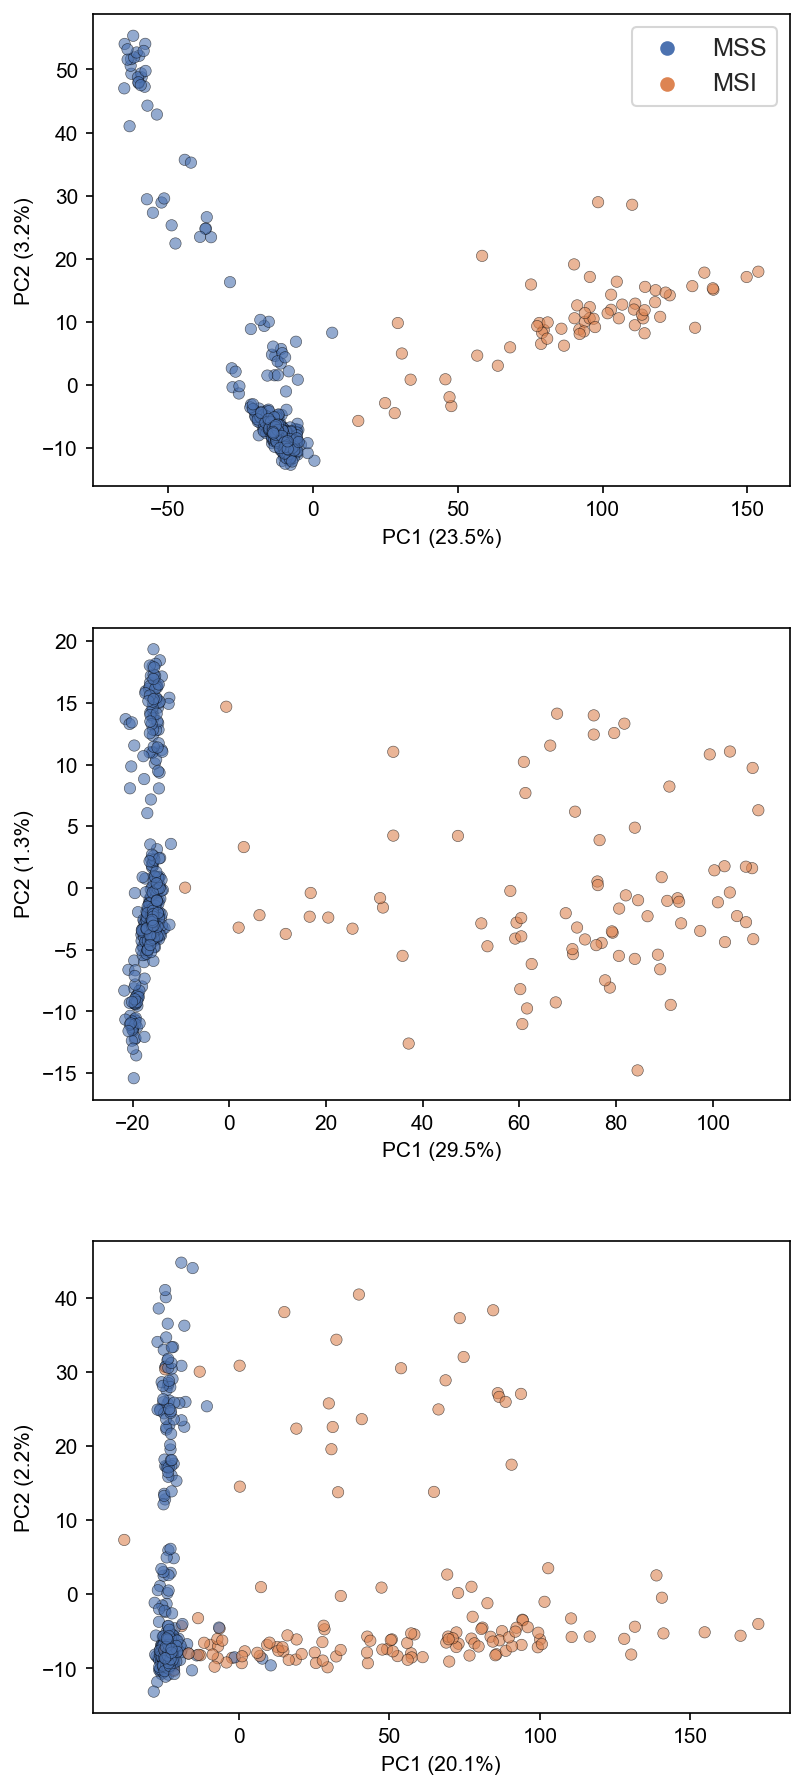

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(6, 15), #tight_layout=True,
                         dpi = 150)
                         #sharex=True)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)

sns.scatterplot(ax = axes[0], 
                data = crc_pt_pca, 
                s = 30,
                alpha = 0.6,
                edgecolor = "black",
                linewidth = 0.3,
                x = "0", y = "1", 
                hue = "msi_status")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))
axes[0].set_xlabel("PC1 (23.5%)")
axes[0].set_ylabel("PC2 (3.2%)")
legend_handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(legend_handles, ['MSS','MSI'], 
           bbox_to_anchor=(1,1))

sns.scatterplot(ax = axes[1],
                data = stad_pt_pca, 
                  s = 30,
                  alpha = 0.6,
                  edgecolor = "black",
                  linewidth = 0.3,
                  x = "0", y = "1", 
                  hue = "msi_status")
axes[1].set_xlabel("PC1 (29.5%)")
axes[1].set_ylabel("PC2 (1.3%)")
axes[1].get_legend().set_visible(False)

sns.scatterplot(ax = axes[2],
                data = ucec_pt_pca, 
                  s = 30,
                  alpha = 0.6,
                  edgecolor = "black",
                  linewidth = 0.3,
                  x = "0", y = "1", 
                  hue = "msi_status")
axes[2].set_xlabel("PC1 (20.1%)")
axes[2].set_ylabel("PC2 (2.2%)")
axes[2].get_legend().set_visible(False)

In [4]:
crc_str_perc = pd.read_csv("./to_group/CRC_STR_perc.csv")[["patient", "perc_loci_var", "mut_type"]]
crc_str_perc = crc_str_perc.query(" mut_type ==  'deletion' ")
crc_pt_pca = crc_pt_pca.merge(crc_str_perc, left_on = "patient_x", right_on = "patient", how = "left")

stad_str_perc = pd.read_csv("./to_group/STAD_STR_perc.csv")[["patient", "perc_loci_var", "mut_type"]]
stad_str_perc = stad_str_perc.query(" mut_type ==  'deletion' ")
stad_pt_pca = stad_pt_pca.merge(stad_str_perc, left_on = "patient_x", right_on = "patient", how = "left")

ucec_str_perc = pd.read_csv("./to_group/UCEC_STR_perc.csv")[["patient", "perc_loci_var", "mut_type"]]
ucec_str_perc = ucec_str_perc.query(" mut_type ==  'deletion' ")
ucec_pt_pca = ucec_pt_pca.merge(ucec_str_perc, left_on = "patient", right_on = "patient", how = "left")

In [5]:
stats.pearsonr(crc_pt_pca["0"], crc_pt_pca["perc_loci_var"])

(0.8915131246381278, 1.3562143142101449e-148)

In [6]:
stats.pearsonr(stad_pt_pca["0"], stad_pt_pca["perc_loci_var"])

(0.8875916324827139, 7.170098230429365e-149)

In [7]:
stats.pearsonr(ucec_pt_pca["0"], ucec_pt_pca["perc_loci_var"])

(0.912127819894658, 1.6610003674996426e-179)

Text(0.5, 1.0, 'UCEC')

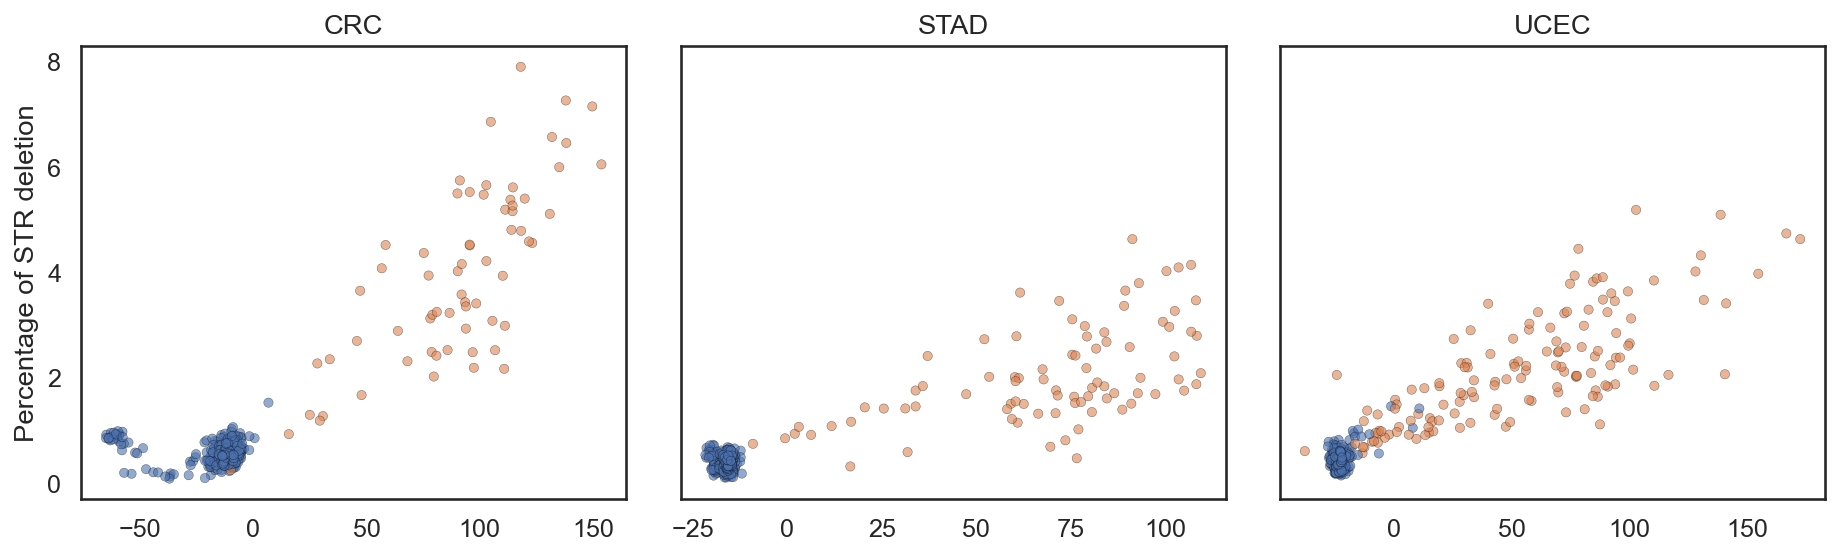

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True, #tight_layout=True,
                         dpi = 150)
custom_params = {"axes.spines.top": False, "axes.spines.right": False}
sns.set_theme(style="white", rc = custom_params, font_scale = 1.1)
fig.subplots_adjust(wspace=0.1)

sns.scatterplot(ax = axes[0],
                data = crc_pt_pca, 
                y = "perc_loci_var", 
                x = "0", 
                hue = "msi_status",
                alpha = 0.6,
                edgecolor = "black",
                linewidth = 0.2,
               
                s = 20)
axes[0].set_ylabel("Percentage of STR deletion")
axes[0].set_xlabel("")
axes[0].get_legend().set_visible(False)
axes[0].set_title("CRC")

sns.scatterplot(ax = axes[1],
                data = stad_pt_pca, 
                y = "perc_loci_var", 
                x = "0", 
                hue = "msi_status",
                alpha = 0.6,
                edgecolor = "black",
                linewidth = 0.2,
                s = 20)
axes[1].set_xlabel("")
axes[1].get_legend().set_visible(False)
axes[1].set_title("STAD")

sns.scatterplot(ax = axes[2],
                data = ucec_pt_pca, 
                y = "perc_loci_var", 
                x = "0", 
                hue = "msi_status",
                alpha = 0.6,
                edgecolor = "black",
                linewidth = 0.2,
                s = 20)
axes[2].set_xlabel("")
axes[2].get_legend().set_visible(False)
axes[2].set_title("UCEC")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

white vs. asian: Mann-Whitney-Wilcoxon test two-sided, P_val:1.181e-02 U_stat=8.070e+02
black or african american vs. white: Mann-Whitney-Wilcoxon test two-sided, P_val:6.635e-27 U_stat=1.506e+04
black or african american vs. asian: Mann-Whitney-Wilcoxon test two-sided, P_val:1.415e-06 U_stat=6.340e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

white vs. asian: Mann-Whitney-Wilcoxon test two-sided, P_val:1.112e-44 U_stat=1.310e+02
black or african american vs. white: Mann-Whitney-Wilcoxon test two-sided, P_val:1.171e-05 U_stat=3.063e+03
black or african american vs. asian: Mann-Whitney-Wilcoxon test two-sided, P_val:2.415e-08 U_stat=2.200e+01
p-value annotation legend:
   

(<AxesSubplot:>,
  <statannotations.Annotation.Annotation at 0x17ca828c1c0>])

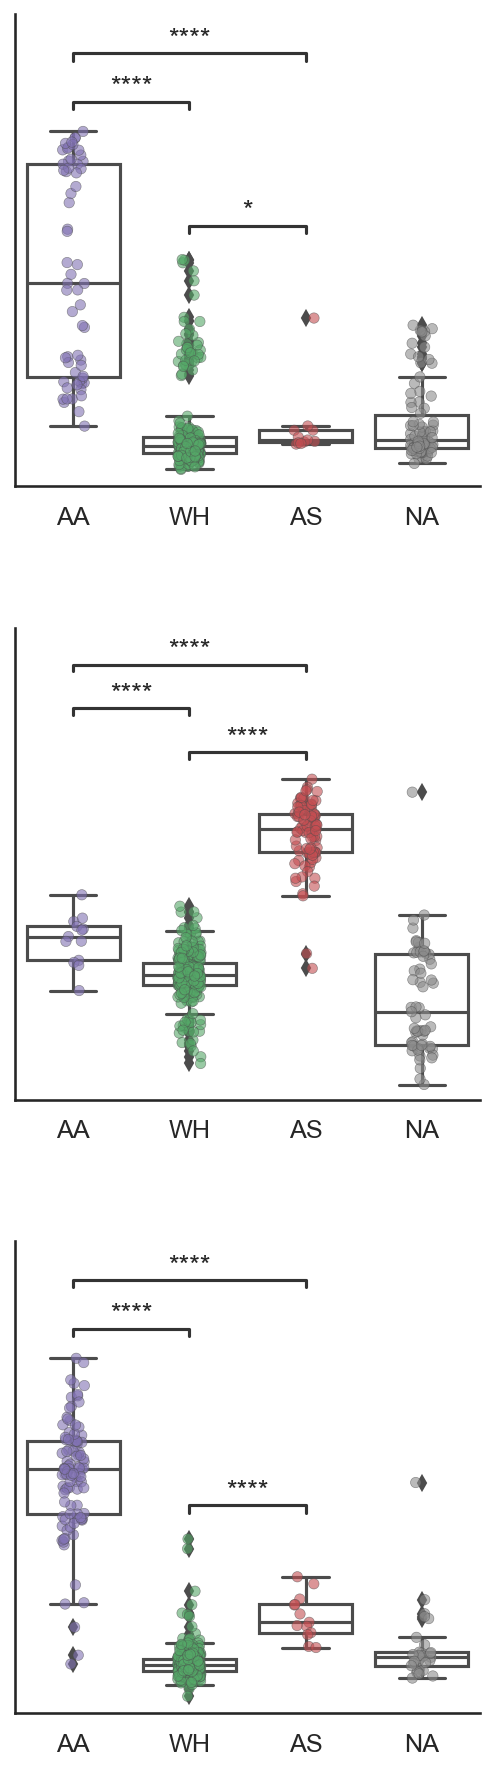

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(4, 15), #tight_layout=True,
                         dpi = 150)
custom_params = {"axes.spines.top": False, "axes.spines.right": False}
sns.set_theme(style="white", rc = custom_params, font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)

color_dict = dict({'black or african american': sns.color_palette()[4],
                  'white':sns.color_palette()[2],
                  'asian': sns.color_palette()[3],
                  'unknown': sns.color_palette()[7],
                  'american indian or alaska native':sns.color_palette()[9],
                  'native hawaiian or other pacific islander': sns.color_palette()[8]})

sns.boxplot(ax = axes[0],
            data = crc_pt_pca, 
            x = "race", y = "1", 
            boxprops={'facecolor':'None'},
            order = ["black or african american", "white", "asian", "unknown"])
sns.stripplot(ax = axes[0],
              data = crc_pt_pca, x = "race", 
              y = "1", size = 5, palette=color_dict, linewidth=0.3, alpha = 0.6,
              order = ["black or african american", "white", "asian", "unknown"])
axes[0].set_ylabel("")
axes[0].set_xticklabels(["AA", "WH", "AS", "NA"])
axes[0].set_xlabel("")
axes[0].set(yticklabels=[])

sns.boxplot(ax = axes[1],
            data = stad_pt_pca, 
            x = "race", y = "1", 
            boxprops={'facecolor':'None'},
           order = ["black or african american", "white", "asian", "unknown"])
sns.stripplot(ax = axes[1],
              data = stad_pt_pca, x = "race", 
              y = "1", size = 5, palette=color_dict, linewidth=0.3, alpha = 0.6,
              order = ["black or african american", "white", "asian", "unknown"])
axes[1].set_ylabel("")
axes[1].set_xticklabels(["AA", "WH", "AS", "NA"])
axes[1].set_xlabel("")
axes[1].set(yticklabels=[])

sns.boxplot(ax = axes[2],
            data = ucec_pt_pca, 
            x = "race", y = "1", 
            boxprops={'facecolor':'None'}, 
            order = ["black or african american", "white", "asian", "unknown"])
sns.stripplot(ax = axes[2],
             data = ucec_pt_pca, x = "race", 
              y = "1", size = 5, palette=color_dict, linewidth=0.3, alpha = 0.6,
               order = ["black or african american", "white", "asian", "unknown"])
axes[2].set_ylabel("")
axes[2].set_xticklabels(["AA", "WH", "AS", "NA"])
axes[2].set_xlabel("")
axes[2].set(yticklabels=[])

annot = Annotator(ax = axes[0], pairs = [("white","asian"), 
                                         ("white", "black or african american"),
                                         ("asian", "black or african american")], 
                  data = crc_pt_pca, x = "race", y = "1",
                  order = ["black or african american", "white", "asian", "unknown"])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test().annotate()

annot = Annotator(ax = axes[1], pairs = [("white","asian"), 
                                         ("white", "black or african american"),
                                         ("asian", "black or african american")], 
                  data = stad_pt_pca, x = "race", y = "1",
                  order = ["black or african american", "white", "asian", "unknown"])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test().annotate()

annot = Annotator(ax = axes[2], pairs = [("white","asian"), 
                                         ("white", "black or african american"),
                                         ("asian", "black or african american")], 
                  data = ucec_pt_pca, x = "race", y = "1",
                  order = ["black or african american", "white", "asian", "unknown"])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test().annotate()

In [10]:
crc_bn_pca = pd.read_csv("./pca_data/crc_bn_pca.csv")
stad_bn_pca = pd.read_csv("./pca_data/stad_bn_pca.csv")
ucec_bn_pca = pd.read_csv("./pca_data/ucec_bn_pca.csv")

In [11]:
ucec_bn_pca["race"].value_counts()

white                                        311
black or african american                     98
unknown                                       29
asian                                         13
native hawaiian or other pacific islander      6
american indian or alaska native               2
Name: race, dtype: int64

Text(0.5, 1.0, 'UCEC')

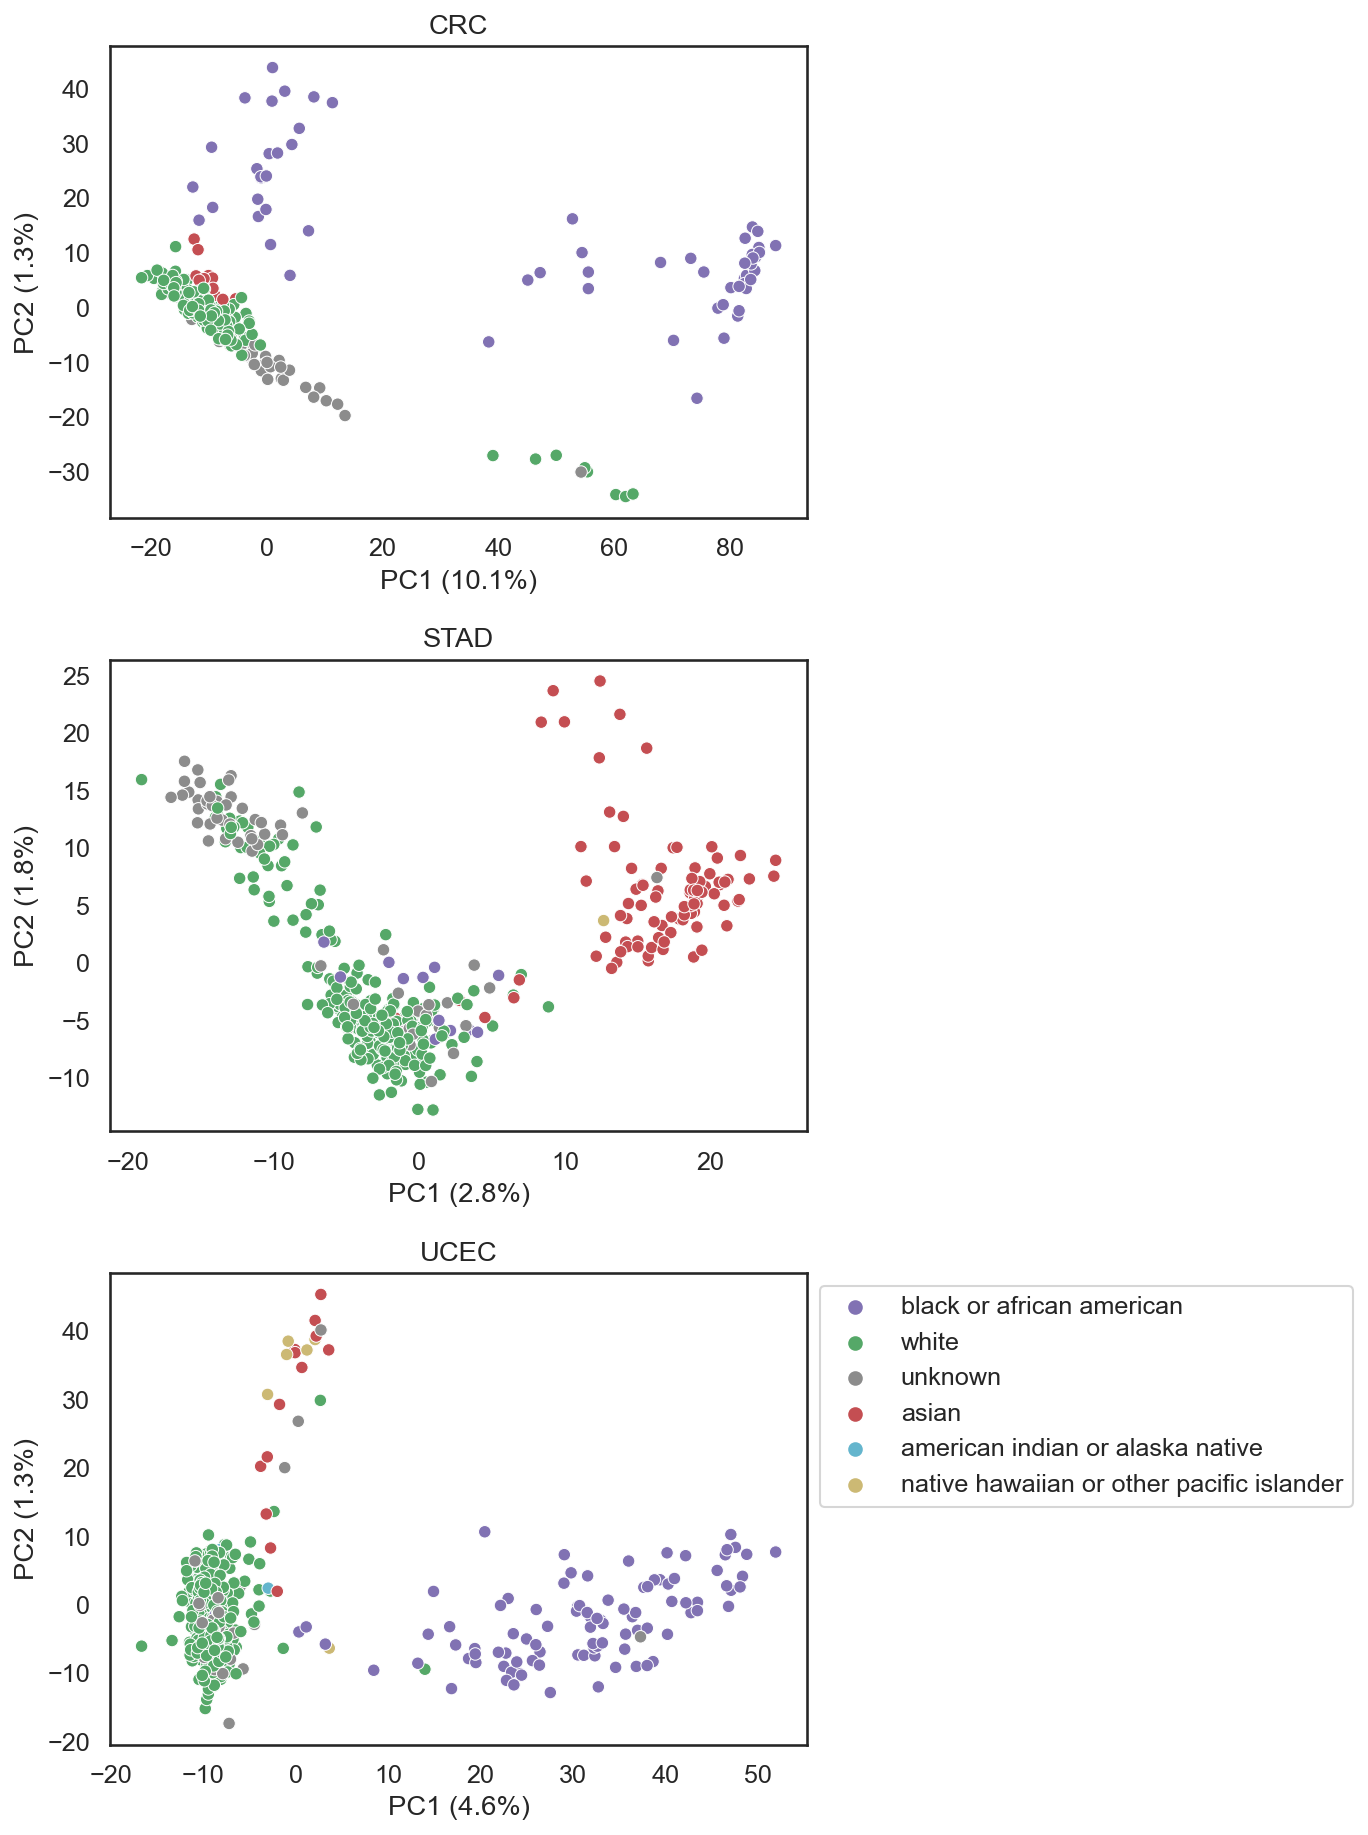

In [87]:
fig, axes = plt.subplots(3, 1, figsize=(6, 15), #tight_layout=True,
                         dpi = 150)
                         #sharex=True)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)
color_dict = dict({'black or african american': sns.color_palette()[4],
                  'white':sns.color_palette()[2],
                  'asian': sns.color_palette()[3],
                  'unknown': sns.color_palette()[7],
                  'american indian or alaska native':sns.color_palette()[9],
                  'native hawaiian or other pacific islander': sns.color_palette()[8]})

sns.scatterplot(ax = axes[0], 
                data = crc_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[0].set_xlabel("PC1 (10.1%)")
axes[0].set_ylabel("PC2 (1.3%)")
axes[0].get_legend().set_visible(False)
axes[0].set_title("CRC")

sns.scatterplot(ax = axes[1], 
                data = stad_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[1].set_xlabel("PC1 (2.8%)")
axes[1].set_ylabel("PC2 (1.8%)")
axes[1].get_legend().set_visible(False)
axes[1].set_title("STAD")

sns.scatterplot(ax = axes[2], 
                data = ucec_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[2].legend(title = "")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))
axes[2].set_xlabel("PC1 (4.6%)")
axes[2].set_ylabel("PC2 (1.3%)")
axes[2].set_title("UCEC")

Text(0.5, 1.0, 'UCEC')

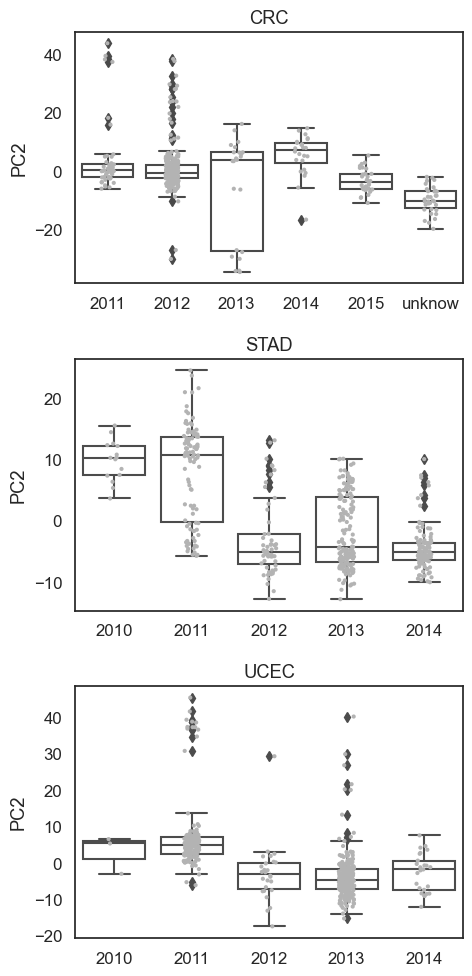

In [93]:
fig, axes = plt.subplots(3, 1, figsize=(5, 12), #tight_layout=True,
                         dpi = 100)
                         #sharex=True)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)

year_order = ["2011", "2012", "2013", "2014", "2015", "unknow"]
sns.boxplot(ax = axes[0],
           data = crc_bn_pca, x = "year", y = "1", 
           boxprops={'facecolor':'None'},
           order = year_order)
sns.stripplot(ax = axes[0],
             data = crc_bn_pca, x = "year", 
              y = "1", size = 3, color = sns.color_palette("Set2")[-1],
              order = year_order)
# #axes.tick_params(axis='x', rotation = 90)
axes[0].set_xlabel("")
axes[0].set_ylabel("PC2")
axes[0].set_title("CRC")

sns.boxplot(ax = axes[1],
            data = stad_bn_pca, x = "year", y = "1", 
           boxprops={'facecolor':'None'})
           #order = year_order)
sns.stripplot(ax = axes[1],
            data = stad_bn_pca, x = "year", 
              y = "1", size = 3, color = sns.color_palette("Set2")[-1])
              #order = year_order)
# #axes.tick_params(axis='x', rotation = 90)
axes[1].set_xlabel("")
axes[1].set_ylabel("PC2")
axes[1].set_title("STAD")

sns.boxplot(ax = axes[2],
            data = ucec_bn_pca, x = "year", y = "1", 
           boxprops={'facecolor':'None'})
           #order = year_order)
sns.stripplot(ax = axes[2],
            data = ucec_bn_pca, x = "year", 
              y = "1", size = 3, color = sns.color_palette("Set2")[-1])
              #order = year_order)
# #axes.tick_params(axis='x', rotation = 90)
axes[2].set_xlabel("")
axes[2].set_ylabel("PC2")
axes[2].set_title("UCEC")

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 15), #tight_layout=True,
                         dpi = 150)
                         #sharex=True)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)
color_dict = dict({'black or african american': sns.color_palette()[4],
                  'white':sns.color_palette()[2],
                  'asian': sns.color_palette()[3],
                  'unknown': sns.color_palette()[7],
                  'american indian or alaska native':sns.color_palette()[9],
                  'native hawaiian or other pacific islander': sns.color_palette()[8]})

sns.scatterplot(ax = axes[0], 
                data = crc_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[0].set_xlabel("PC1 (10.1%)")
axes[0].set_ylabel("PC2 (1.3%)")
axes[0].get_legend().set_visible(False)

sns.scatterplot(ax = axes[1], 
                data = stad_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[1].set_xlabel("PC1 (2.8%)")
axes[1].set_ylabel("PC2 (1.8%)")
axes[1].get_legend().set_visible(False)

sns.scatterplot(ax = axes[2], 
                data = ucec_bn_pca, 
                x = "0", y = "1", 
                palette=color_dict,
                hue = "race")
axes[2].legend(title = "")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))
axes[2].set_xlabel("PC1 (4.6%)")
axes[2].set_ylabel("PC2 (1.3%)")

In [84]:
crc_bn_pt = pd.merge(crc_bn_pca[["0", "1", "patient_x"]], 
                     crc_pt_pca[["0", "1", "patient_x"]], on = "patient_x")
stad_bn_pt = pd.merge(stad_bn_pca[["0", "1", "patient_x"]], 
                     stad_pt_pca[["0", "1", "patient_x"]], on = "patient_x")
ucec_bn_pt = pd.merge(ucec_bn_pca[["0", "1", "patient"]], 
                     ucec_pt_pca[["0", "1", "patient"]], on = "patient")

In [85]:
stats.pearsonr(crc_bn_pt["0_x"], crc_bn_pt["1_y"])

(0.8600521444485348, 2.7830673871060595e-126)

In [86]:
stats.pearsonr(stad_bn_pt["0_x"], stad_bn_pt["1_y"])

(0.9373420415076145, 9.156032874281995e-202)

In [87]:
stats.pearsonr(ucec_bn_pt["0_x"], ucec_bn_pt["1_y"])

(0.9788585992238644, 2.3100948777e-314)

Text(0.5, 0, 'PC1 (4.6%)')

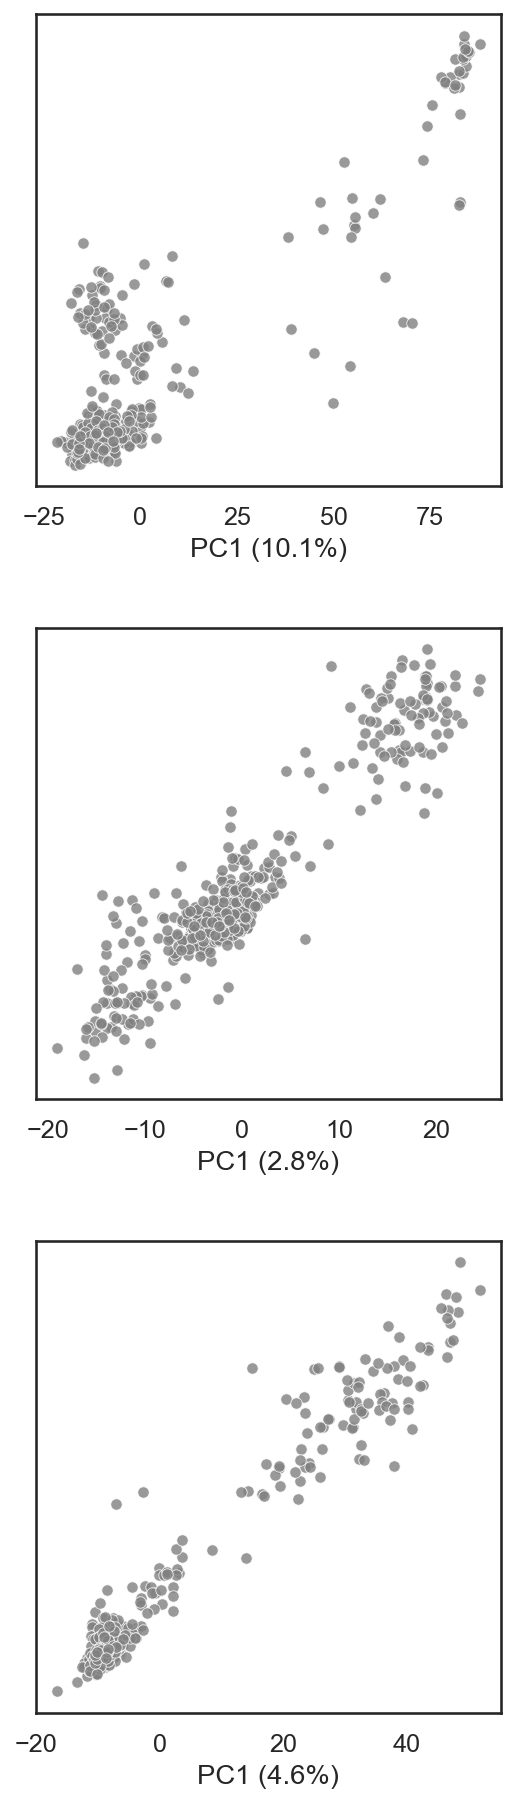

In [145]:
fig, axes = plt.subplots(3, 1, figsize=(4, 15), #tight_layout=True,
                         dpi = 150)
                         #sharex=True)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.1)
fig.subplots_adjust(hspace=0.3)

sns.scatterplot(ax = axes[0], data = crc_bn_pt, 
                x = "0_x", y = "1_y", 
                s = 30,
                color = "gray", alpha = 0.8)
axes[0].set_ylabel("")
axes[0].set(yticklabels=[])
axes[0].set_xlabel("PC1 (10.1%)")

sns.scatterplot(ax = axes[1], data = stad_bn_pt, 
                x = "0_x", y = "1_y",
                s = 30,
                color = "gray",
                alpha = 0.8
                )
axes[1].set_ylabel("")
axes[1].set(yticklabels=[])
axes[1].set_xlabel("PC1 (2.8%)")

sns.scatterplot(ax = axes[2], data = ucec_bn_pt, 
                x = "0_x", y = "1_y",
                s = 30,
                alpha = 0.8,
                color = "gray")
axes[2].set_ylabel("")
axes[2].set(yticklabels=[])
axes[2].set_xlabel("PC1 (4.6%)")